Análises com arquivos csv antes dos tratamentos:

In [ ]:
!pip install seaborn matplotlib

In [ ]:
# Análise Descritiva 
# 
# Base: cooperativa, associado, conta, operacao

# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Leitura dos arquivos CSV com caminho absoluto
df_cooperativa = pd.read_csv("/app/input/base_cooperativa.csv", sep=";", encoding="latin-1")
df_associado   = pd.read_csv("/app/input/base_associado.csv", sep=";", encoding="latin-1")
df_conta       = pd.read_csv("/app/input/base_conta.csv", sep=";", encoding="latin-1")
df_operacao    = pd.read_csv("/app/input/base_operacao.csv", sep=";", encoding="latin-1")

print("Tabelas lidas com sucesso com Pandas!")

Tabelas lidas com sucesso com Pandas!


In [ ]:
# Tratamento e limpeza

df_associado['data_nascimento'] = pd.to_datetime(df_associado['data_nascimento'], format='%d/%m/%Y', errors='coerce')
df_associado['idade'] = ((pd.Timestamp.now() - df_associado['data_nascimento']).dt.days // 365)

df_conta['data_abertura'] = pd.to_datetime(df_conta['data_abertura'], format='%d/%m/%Y', errors='coerce')

df_operacao['data_liberacao']  = pd.to_datetime(df_operacao['data_liberacao'], format='%d/%m/%Y', errors='coerce')
df_operacao['data_vencimento'] = pd.to_datetime(df_operacao['data_vencimento'], format='%d/%m/%Y', errors='coerce')
df_operacao['data_referencia'] = pd.to_datetime(df_operacao['data_referencia'], format='%d/%m/%Y', errors='coerce')
df_operacao['valor_operacao'] = pd.to_numeric(df_operacao['valor_operacao'], errors='coerce')
df_operacao['valor_atualizado'] = pd.to_numeric(df_operacao['valor_atualizado'], errors='coerce')
df_operacao['taxa_juros'] = pd.to_numeric(df_operacao['taxa_juros'], errors='coerce')

In [ ]:
# Estatísticas gerais

print("Associados:")
print(df_associado.describe(include='all'))

print("\nContas:")
print(df_conta.describe(include='all'))

print("\nOperações:")
print(df_operacao.describe())

Associados:
               id  id_cooperativa      cpf_cnpj              nome  \
count   13.000000       13.000000  1.300000e+01                13   
unique        NaN             NaN           NaN                13   
top           NaN             NaN           NaN  Marizete Pereira   
freq          NaN             NaN           NaN                 1   
mean    10.923077       11.923077  1.019038e+12               NaN   
min      1.000000        1.000000  3.298521e+09               NaN   
25%      4.000000        5.000000  9.899911e+09               NaN   
50%      8.000000       19.000000  5.985211e+10               NaN   
75%     16.000000       19.000000  9.085211e+10               NaN   
max     31.000000       19.000000  1.259745e+13               NaN   
std      9.313624        8.067027  3.479073e+12               NaN   

                      data_nascimento      idade  
count                              13  13.000000  
unique                            NaN        NaN  
top   

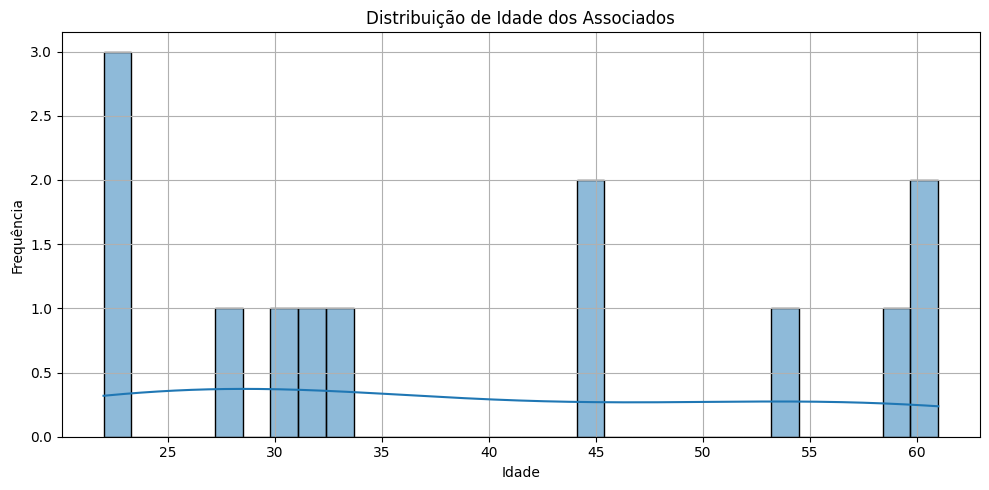

In [ ]:
# Distribuição da idade dos associados

plt.figure(figsize=(10, 5))
sns.histplot(df_associado['idade'].dropna(), bins=30, kde=True)
plt.title("Distribuição de Idade dos Associados")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.grid(True)
plt.tight_layout()
plt.show()

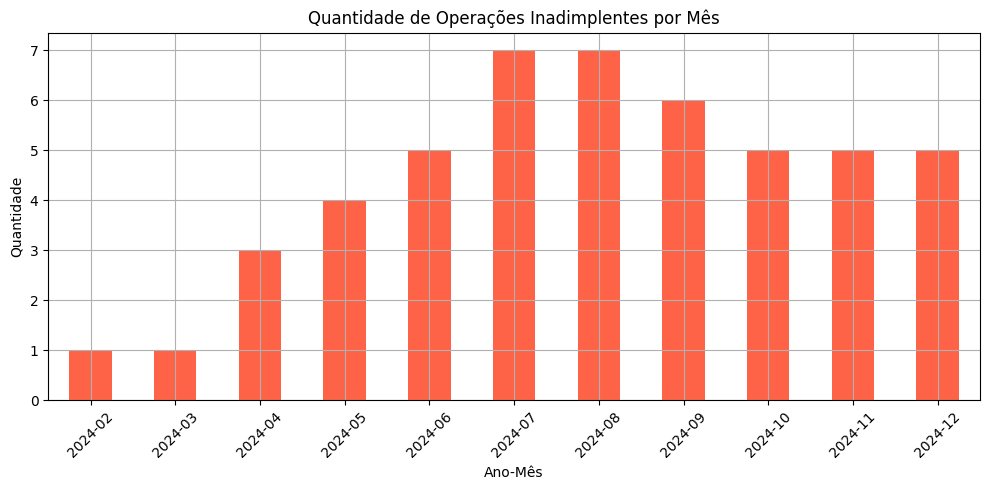

In [ ]:
# Inadimplência por mês

df_operacao['ano_mes'] = df_operacao['data_referencia'].dt.to_period("M")
inad_mensal = df_operacao[df_operacao['situacao_atualizada'] == 'INADIMPLENTE'].groupby('ano_mes').size()

plt.figure(figsize=(10, 5))
inad_mensal.plot(kind='bar', color='tomato')
plt.title("Quantidade de Operações Inadimplentes por Mês")
plt.ylabel("Quantidade")
plt.xlabel("Ano-Mês")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Distribuição por faixa etária'}, xlabel='faixa_etaria'>

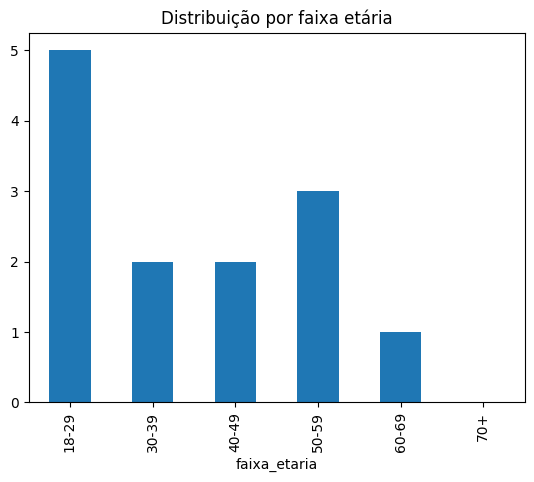

In [ ]:
# Distribuição por faixa etária dos associados
bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df_associado['faixa_etaria'] = pd.cut(df_associado['idade'], bins=bins, labels=labels)
df_associado['faixa_etaria'].value_counts().sort_index().plot(kind='bar', title="Distribuição por faixa etária")

Análises dos dados tratados Silver e Gold:

In [ ]:
# Criação da Função de Leitura

def read_csv_from_datalake_pandas(path_suffix):
    """
    Função para ler arquivos CSV específicos das camadas Silver/Gold do Data Lake com Pandas.
    Args:
        path_suffix (str): O sufixo do caminho para o arquivo CSV, ex: "silver/dim_cooperativa/part-00000-....csv"
                           ou "gold/inadimplencia_mensal/part-00000-....csv".
    Returns:
        pd.DataFrame: O DataFrame do Pandas com os dados do CSV.
    """
    base_path = "/app/datalake/"
    full_path = f"{base_path}{path_suffix}"
    return pd.read_csv(full_path, sep=";", encoding="latin-1")

print("Função 'read_csv_from_datalake_pandas' definida.")

Função 'read_csv_from_datalake_pandas' definida.


In [ ]:
# Leitura dos DFs: Silver e Gold

df_cooperativa = read_csv_from_datalake_pandas("silver/dim_cooperativa/part-00000-736a1732-5784-4259-bcf8-de66a6d9e6b3-c000.csv")
df_associado   = read_csv_from_datalake_pandas("silver/dim_associado/part-00000-dbb6cf1b-7e79-4af0-84bc-075e58148be8-c000.csv")
df_conta       = read_csv_from_datalake_pandas("silver/dim_conta/part-00000-d99bf633-dbf2-4138-bccf-4c82cad87811-c000.csv")
df_operacao    = read_csv_from_datalake_pandas("silver/fct_operacao_credito/part-00000-6aa64210-7f87-4fbc-a9e6-ec5f2ac8d098-c000.csv")


# --- Camada Gold ---
df_inadimplencia_mensal = read_csv_from_datalake_pandas("gold/inadimplencia_mensal/part-00000-71d45545-ef3a-4293-8e45-a97ce12fe412-c000.csv")
df_inadimplencia_por_cooperativa = read_csv_from_datalake_pandas("gold/inadimplencia_por_cooperativa/part-00000-69b5343f-54fc-4515-b1b1-feab3d4395db-c000.csv")
df_media_idade_por_faixa = read_csv_from_datalake_pandas("gold/media_idade_por_faixa/part-00000-336dedeb-9d25-4f8c-9417-a66f23507b82-c000.csv")

print("Todos os DataFrames das camadas Silver e Gold lidos com sucesso usando Pandas!")


# Padronização de nomes de colunas
def standardize_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

df_cooperativa = standardize_column_names(df_cooperativa)
df_associado = standardize_column_names(df_associado)
df_conta = standardize_column_names(df_conta)
df_operacao = standardize_column_names(df_operacao)
df_inadimplencia_mensal = standardize_column_names(df_inadimplencia_mensal)
df_inadimplencia_por_cooperativa = standardize_column_names(df_inadimplencia_por_cooperativa)
df_media_idade_por_faixa = standardize_column_names(df_media_idade_por_faixa)

print("Nomes das colunas padronizados para todos os DataFrames.")

Todos os DataFrames das camadas Silver e Gold lidos com sucesso usando Pandas!
Nomes das colunas padronizados para todos os DataFrames.


In [ ]:
# Verificando os Tipos de Dados (Pandas)

print("Verificando tipos de dados inferidos por Pandas:")

print("\n--- df_cooperativa.info() ---")
df_cooperativa.info()

print("\n--- df_associado.info() ---")
df_associado.info()

print("\n--- df_conta.info() ---")
df_conta.info()

print("\n--- df_operacao.info() ---")
df_operacao.info()

print("\n--- df_inadimplencia_mensal.info() ---")
df_inadimplencia_mensal.info()

print("\n--- df_inadimplencia_por_cooperativa.info() ---")
df_inadimplencia_por_cooperativa.info()

print("\n--- df_media_idade_por_faixa.info() ---")
df_media_idade_por_faixa.info()

print("\nVerificação de tipos concluída. Prossiga para a análise descritiva e visualizações.")

Verificando tipos de dados inferidos por Pandas:

--- df_cooperativa.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id,cod_entidade,nome_coop  3 non-null      object
dtypes: object(1)
memory usage: 152.0+ bytes

--- df_associado.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   id,id_cooperativa,cpf_cnpj,nome,data_nascimento,idade  13 non-null     object
dtypes: object(1)
memory usage: 232.0+ bytes

--- df_conta.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column                                   Non-Null Cou

In [ ]:
# Análise Descritiva Geral

print("Quantidade de registros por tabela:")

print("Cooperativa (Silver):", df_cooperativa.shape[0]) # Usando .shape[0] para a contagem de linhas

print("Associado (Silver):", df_associado.shape[0])

print("Conta (Silver):", df_conta.shape[0])

print("Operação (Silver):", df_operacao.shape[0])

print("\n--- Resumo Estatístico para df_associado (Silver) ---")

print(df_associado.describe(include='all'))

print("\n--- Resumo Estatístico para df_conta (Silver) ---")

print(df_conta.describe(include='all'))

print("\n--- Resumo Estatístico para df_operacao (Silver) ---")

print(df_operacao.describe(include='all'))

Quantidade de registros por tabela:
Cooperativa (Silver): 3
Associado (Silver): 13
Conta (Silver): 12
Operação (Silver): 111

--- Resumo Estatístico para df_associado (Silver) ---
       id,id_cooperativa,cpf_cnpj,nome,data_nascimento,idade
count                                                  13   
unique                                                 13   
top        1,1,59852106885,Marizete Pereira,1965-09-12,59   
freq                                                    1   

--- Resumo Estatístico para df_conta (Silver) ---
       id,id_associado,cod_conta,data_abertura
count                                       12
unique                                      12
top                  1,1,0000000001,1980-03-21
freq                                         1

--- Resumo Estatístico para df_operacao (Silver) ---
       id,id_conta,id_cooperativa,cod_operacao,valor_operacao,data_liberacao,data_vencimento,qtd_parcelas,taxa_juros,id_operacao,situacao_atualizada,valor_atualizado,data_refe

In [ ]:
# Verificando a Existência/Quantidade de Dados Nulos

print("--- Quantidade de Dados Nulos por DataFrame ---")

print("\nDataFrame: df_cooperativa")
print(df_cooperativa.isnull().sum())

print("\nDataFrame: df_associado")
print(df_associado.isnull().sum())

print("\nDataFrame: df_conta")
print(df_conta.isnull().sum())

print("\nDataFrame: df_operacao")
print(df_operacao.isnull().sum())

print("\nDataFrame: df_inadimplencia_mensal")
print(df_inadimplencia_mensal.isnull().sum())

print("\nDataFrame: df_inadimplencia_por_cooperativa")
print(df_inadimplencia_por_cooperativa.isnull().sum())

print("\nDataFrame: df_media_idade_por_faixa")
print(df_media_idade_por_faixa.isnull().sum())

print("\nVerificação de nulos concluída.")

--- Quantidade de Dados Nulos por DataFrame ---

DataFrame: df_cooperativa
id,cod_entidade,nome_coop    0
dtype: int64

DataFrame: df_associado
id,id_cooperativa,cpf_cnpj,nome,data_nascimento,idade    0
dtype: int64

DataFrame: df_conta
id,id_associado,cod_conta,data_abertura    0
dtype: int64

DataFrame: df_operacao
id,id_conta,id_cooperativa,cod_operacao,valor_operacao,data_liberacao,data_vencimento,qtd_parcelas,taxa_juros,id_operacao,situacao_atualizada,valor_atualizado,data_referencia    0
dtype: int64

DataFrame: df_inadimplencia_mensal
ano_mes,qtd_inadimplente    0
dtype: int64

DataFrame: df_inadimplencia_por_cooperativa
id_cooperativa,qtd_inadimplente    0
dtype: int64

DataFrame: df_media_idade_por_faixa
faixa_etaria,media_idade    0
dtype: int64

Verificação de nulos concluída.


In [ ]:
# Verificando a Existência e Quantidade de Dados Nulos: Gold

print("\n--- Quantidade de Dados Nulos por DataFrame (Camada Gold) ---")

print("\nDataFrame: df_inadimplencia_mensal")
print(df_inadimplencia_mensal.isnull().sum().to_string())

print("\nDataFrame: df_inadimplencia_por_cooperativa")
print(df_inadimplencia_por_cooperativa.isnull().sum().to_string())

print("\nDataFrame: df_media_idade_por_faixa")
print(df_media_idade_por_faixa.isnull().sum().to_string())

print("\nVerificação de nulos concluída.")



--- Quantidade de Dados Nulos por DataFrame (Camada Gold) ---

DataFrame: df_inadimplencia_mensal
ano_mes,qtd_inadimplente    0

DataFrame: df_inadimplencia_por_cooperativa
id_cooperativa,qtd_inadimplente    0

DataFrame: df_media_idade_por_faixa
faixa_etaria,media_idade    0

Verificação de nulos concluída.


In [ ]:
# Visão Geral e Quantidade de Registros: Gold

print("--- Visão Geral e Quantidade de Registros (Camada Gold) ---")

print("\nDataFrame: df_inadimplencia_mensal")
print(df_inadimplencia_mensal.info())
print(f"Total de registros: {df_inadimplencia_mensal.shape[0]}")
print(df_inadimplencia_mensal.head())

print("\nDataFrame: df_inadimplencia_por_cooperativa")
print(df_inadimplencia_por_cooperativa.info())
print(f"Total de registros: {df_inadimplencia_por_cooperativa.shape[0]}")
print(df_inadimplencia_por_cooperativa.head())

print("\nDataFrame: df_media_idade_por_faixa")
print(df_media_idade_por_faixa.info())
print(f"Total de registros: {df_media_idade_por_faixa.shape[0]}")
print(df_media_idade_por_faixa.head())

--- Visão Geral e Quantidade de Registros (Camada Gold) ---

DataFrame: df_inadimplencia_mensal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ano_mes,qtd_inadimplente  11 non-null     object
dtypes: object(1)
memory usage: 216.0+ bytes
None
Total de registros: 11
  ano_mes,qtd_inadimplente
0                2024-09,6
1                2024-02,1
2                2024-08,7
3                2024-06,5
4                2024-12,5

DataFrame: df_inadimplencia_por_cooperativa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   id_cooperativa,qtd_inadimplente  2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes
None
Total de registros: 2
  id_